Pyber Analysis

Andrew Smith
Chief Data Strategist

Trends and Analysis:
1. While acknowledging that (as expected) urban environments account for the overwhelming majority of our subcontracted drivers, individual rides, and revenue, the data shows that rural environments  yield disproportionately higher fares per ride. This trend can most likely be attributed to the fact rural towns typically lack extensive public transit systems in congruence with the fact that points of interest (locations people travel between) are spread out over greater distances. 

2. While looking at the data presented in the chart "Pyber Ride Sharing Data (2018)," it is clear that the majority of our efforts up to this point have been put toward the disruption of the established ridesharing industry in urban environments. Given that a city-scape is by definition more densely populated than rural and suburban communities, it has made sense to build overall brand recognition in these environments. As we are still in the early days of our operation, we should continue to pursue this strategy of establishment in urban areas. 

3. As our company matures and approaches a level of recognizability comparable to that of the industry's current leaders, there is an opportunity to be siezed in the rural towns around the nation. While the ride-sharing industry as a whole is still relatively new and ahead of the regulatory curve, congressional legislation high-profile court decisions have already begun to catch up in this brave new world. Depending on the ever-changing understanding of the shared liability between ride-sharing companies and their subcontracted drivers, it could very well benefit this company to focus on expansion in areas that have fewer hazards to drivers as well as higher earnings per ride.

In [43]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load) 

#Get rid of duplicates
city_data = city_data.drop_duplicates('city', keep = 'first')

# Combine the data into a single dataset
pyber_df = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
pyber_df = pyber_df[["city", "date", "fare", "ride_id", "driver_count", "type"]]
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

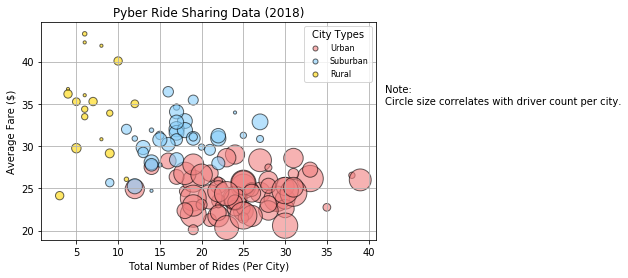

In [44]:
# Obtain the x and y coordinates for each of the three city types
#groupby city
urban_city = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
suburban_city = pyber_df[pyber_df["type"] == "Suburban"].groupby([pyber_df["city"]])
rural_city = pyber_df[pyber_df["type"] == "Rural"].groupby([pyber_df["city"]])

#create variables to become x, y, and s for each city type
urban_x = urban_city["ride_id"].count()
urban_y = urban_city["fare"].mean()
urban_s = urban_city["driver_count"].mean()

suburban_x = suburban_city["ride_id"].count()
suburban_y = suburban_city["fare"].mean()
suburban_s = suburban_city["driver_count"].mean()

rural_x = rural_city["ride_id"].count()
rural_y = rural_city["fare"].mean()
rural_s = rural_city["driver_count"].mean()

# create handles for each plot
urban_1 = plt.scatter(urban_x, urban_y, s=urban_s*10, color="lightcoral", edgecolor="black", label="Urban", alpha=.6)
suburban_1 = plt.scatter(suburban_x, suburban_y, s=suburban_s*10, color="lightskyblue", edgecolor="black", label="Suburban", alpha=.6)
rural_1 = plt.scatter(rural_x, rural_y, s=rural_s*10, color="gold", edgecolor="black", label="Rural", alpha=.6)

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")
plt.grid()


# Add the text on the right hand side of the scatterplot
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Create a legend
legend = plt.legend(title = "City Types", fontsize = 8, loc="upper right")

#Change legend sizes
legend.legendHandles[0]._sizes = [25]
legend.legendHandles[1]._sizes = [25]
legend.legendHandles[2]._sizes = [25]

# Save Figure 
plt.savefig("../Images/Ride.png", bbox_inches="tight")

#Show Figure
plt.show()

In [45]:
# Show plot
plt.show()

## Total Fares by City Type

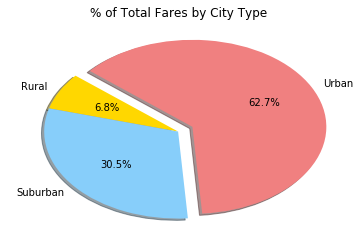

In [46]:
# Calculate Type Percents
city_groups = pyber_df.groupby(['type'])
fare_sum = city_groups['fare'].sum()
        
        
colors = ["gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.12)

# Build Pie Chart
plt.pie(fare_sum, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Images/FaresbyCity.png")

#Show Figure


In [47]:
# Show Figure
plt.show()

## Total Rides by City Type

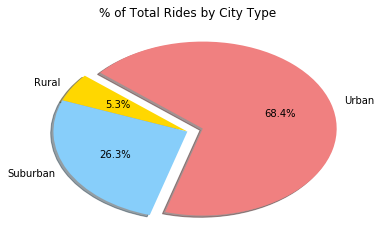

In [48]:
# Calculate Ride Percents
ride_count = city_groups['ride_id'].count()

# Build Pie Chart
plt.pie(ride_count, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig(""../Images/RidesbyCity.png")
plt.show()

In [49]:
# Show Figure
plt.show()

## Total Drivers by City Type

Text(0.5,1,'% of Total Drivers by City Type')

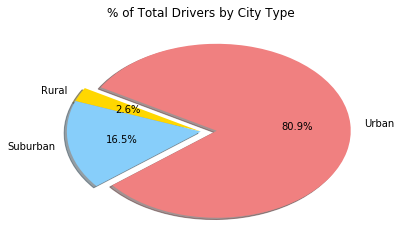

In [50]:
# Calculate Driver Percents
drivers_grouped = city_data.groupby(['type'])
drivers_sum = drivers_grouped['driver_count'].sum()
drivers_sum.head()

# Build Pie Charts
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Drivers by City Type")


# Save Figure
plt.savefig("../Images/DriversbyCity.png")

In [51]:
# Show Figure
plt.show()